## Mounting your google drive

You can use google drive to store and access files e.g. storing and loading data from numpy or CSV files.  
Use the following command to mount your GDrive and access your files.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install ffmpeg
!pip install vtk

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=7b1c7c2a695b4d39ccb52bcfcceeca1f1a8d17e51a54e0fdfd584d356ebb3373
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
     |████████████████████████████████| 59.5 MB 40 kB/s 
     |████████████████████████████████| 495 kB 81.9 MB/s 
     |████████████████████████████████| 3.1 MB 68.9 MB/s 
     |████████████████████████████████| 3.2 MB 60.1 MB/s 
     |████████████████████████████████| 74 kB 4.0 MB/s 
     |████████████████████████████████| 251 kB 91.7 MB/s 
     |████████████████████████████████| 1.3 MB 82.3 MB/s 
     |████████████████████████████████| 142 kB 92.2 MB/s 
     |████████████████████████████████| 294 kB 69.1 MB/s 


In [3]:
import os
# change the current path. The user can adjust the path depend on the requirement
os.chdir("/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF")
import vtktools

In [4]:
# !unzip csv_data.zip 

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import numpy.linalg as la
import scipy.linalg as sl
import scipy.sparse.linalg as spl
import matplotlib.pyplot as plt
import torch.nn as nn  # Neural network module
import scipy.sparse as sp
import scipy.optimize as sop
import progressbar
# making slopes
import torch
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from matplotlib.pyplot import LinearLocator
import matplotlib as mpl
import matplotlib.colors as colors


# create an animation
from matplotlib import animation
from IPython.display import HTML

from matplotlib import animation
import math
import ffmpeg

!pip install pycm livelossplot
%pylab inline
from livelossplot import PlotLosses

from torch.utils.data import DataLoader
import torch.utils.data as Data

import time
import platform
print('python version', platform.python_version())
print('torch version', torch.__version__)
print('numpy version', np.version.version)

     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 571 kB 15.5 MB/s 
Populating the interactive namespace from numpy and matplotlib
python version 3.7.11
torch version 1.9.0+cu102
numpy version 1.19.5


In [6]:
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = True  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = True

    return True

device = 'cuda'  # Set out device to GPU

print('Cuda installed, running on GPU!')  # print sentence

Cuda installed, running on GPU!


# SVD

In [7]:
def saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index):
    # save training and validation loss    
    np.savetxt(path_train,train_index, delimiter=',')
    np.savetxt(path_valid,valid_index, delimiter=',')
    np.savetxt(path_test,test_index, delimiter=',')

def getIndex(path_train,path_valid,path_test):
    train_index = np.loadtxt(path_train,delimiter=",")
    valid_index = np.loadtxt(path_valid,delimiter=",")
    test_index = np.loadtxt(path_test,delimiter=",")
    return train_index,valid_index,test_index

In [8]:
path_train = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_train_index.csv"
path_valid = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_valid_index.csv"
path_test = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_test_index.csv"
# saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index)

In [9]:
# Load the train_index, valid_index and test_index
train_index,valid_index,test_index= getIndex(path_train,path_valid,path_test)
print(test_index)

[ 133.  490. 1480.  730.  481. 1382.  440.  750. 1502. 1451.  692. 1094.
 1679.  510. 1241. 1101.  543. 1312. 1432. 1988. 1148. 1801. 1519.  367.
 1858. 1043. 1175. 1218. 1479.  103. 1363.  800.  258. 1851.  267.  999.
  611. 1824.  318.  753. 1413.  727. 1273. 1358. 1090.  838.  250. 1763.
 1038.  439. 1199.  334. 1848. 1924. 1013.  271.  936.  600. 1553.  423.
 1467. 1658.  929. 1748.  783.  329.  303. 1067.  868.  374. 1102. 1843.
  683.  449.  855. 1142. 1393.  194. 1112.  636. 1617. 1910. 1722.  536.
 1149. 1765.  468. 1922. 1703. 1311.  341.  110. 1258. 1257. 1711.   93.
 1969.  396. 1259.  199.  962. 1704.  462. 1407.  634.  535. 1505.  537.
  612. 1707. 1565. 1963. 1955.    3. 1058. 1946.  372. 1653. 1077.  414.
  469.  680. 1430.  649.  215.  234. 1692.  653. 1455.  582. 1169. 1138.
  411.  518.  865. 1977. 1688.  822.  397. 1388. 1221.  239.  249. 1781.
 1751.  915.  278. 1970.  907.  477. 1552.  703.  870.  916. 1650.  561.
 1401.  129. 1123. 1804. 1871. 1527.  308.   94. 19

## SVD

### load data

In [10]:
os.chdir('/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF')
print(os.getcwd())

# read in the data (1000 csv files)
nTrain = 1600
nValid = 200
nTest = 200
nTotal = nTrain + nValid + nTest
nNodes = 20550 # should really work this out


# The below method to load data is too slow. Therefore, we use load pt file

# [:, :, 2] is speed, [:, :, 3] is u, [:, :, 4] is v
# (speed not really needed)
# [:, :, 0] and [:, :, 1] are the SFC orderings

# training_data = np.zeros((nTrain,nNodes,5))
# for i in range(nTrain):
#     data = np.loadtxt('csv_data/data_' +str(int(train_index[i]))+ '.csv', delimiter=',')
#     training_data[i,:,:] = data
# training_data = np.array(training_data)
# print('size training data', training_data.shape)

# valid_data = np.zeros((nValid,nNodes,5))
# for i in range(nValid):
#     data = np.loadtxt('csv_data/data_' +str(int(valid_index[i]))+ '.csv', delimiter=',')
#     valid_data[i,:,:] = data
# valid_data = np.array(valid_data)
# print('size validation data', valid_data.shape)

# test_data = np.zeros((nTest,nNodes,5))
# for i in range(nTest):
#     data = np.loadtxt('csv_data/data_' +str(int(test_index[i]))+ '.csv', delimiter=',')
#     test_data[i,:,:] = data
# test_data = np.array(test_data)
# print('size test data', test_data.shape)

# total_data = np.zeros((nTotal,nNodes,5))
# for i in range(len(train_index)):
#     total_data[int(train_index[i]),:,:] = training_data[i,:,:]

# for i in range(len(valid_index)):
#     total_data[int(valid_index[i]),:,:] = valid_data[i,:,:]

# for i in range(len(test_index)):
#     total_data[int(test_index[i]),:,:] = test_data[i,:,:]
# print('size total data', total_data.shape)



/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF


In [11]:
# load the data, this method save the time
training_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_train.pt')
valid_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_valid.pt')
test_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_test.pt')
total_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_total.pt')
print(training_data.shape)
print(valid_data.shape)
print(test_data.shape)
print(total_data.shape)

(1600, 20550, 5)
(200, 20550, 5)
(200, 20550, 5)
(2000, 20550, 5)


In [12]:
# total_data = np.concatenate((training_data, valid_data, test_data))
# print(total_data.shape)

In [13]:
# rescale the data so that u and v data lies in the range [-1,1] (and speed in [0,1])
ma = np.max(training_data[:, :, 2])
mi = np.min(training_data[:, :, 2])
k = 1./(ma - mi)
b = 1 - k*ma #k*mi
# training_data[:, :, 2] = k * training_data[:, :, 2] + b #- b
# this won't be used

ma = np.max(training_data[:, :, 3])
mi = np.min(training_data[:, :, 3])
ku = 2./(ma - mi)
bu = 1 - ku*ma 
training_data[:, :, 3] = ku * training_data[:, :, 3] + bu
valid_data[:, :, 3] = ku * valid_data[:, :, 3] + bu
test_data[:, :, 3] = ku * test_data[:, :, 3] + bu
total_data[:, :, 3] = ku * total_data[:, :, 3] + bu

ma = np.max(training_data[:, :, 4])
mi = np.min(training_data[:, :, 4])
kv = 2./(ma - mi)
bv = 1 - kv*ma
training_data[:, :, 4] = kv * training_data[:, :, 4] + bv
valid_data[:, :, 4] = kv * valid_data[:, :, 4] + bv
test_data[:, :, 4] = kv * test_data[:, :, 4] + bv
total_data[:, :, 4] = kv * total_data[:, :, 4] + bv

In [14]:
snaps = np.zeros([nTrain,nNodes])
snaps1 = np.zeros([nTrain,nNodes])
snaps2 = np.zeros([nValid,nNodes])
snaps3 = np.zeros([nValid,nNodes])
snaps4 = np.zeros([nTest,nNodes])
snaps5 = np.zeros([nTest,nNodes])

for i in range(nTrain):
    snaps[i,:] = training_data[i,:,3]
    snaps1[i,:] = training_data[i,:,4]

snapstrain = np.c_[snaps,snaps1]
#the train matrix
print('snapstrain shape: ',snapstrain.shape)

for i in range(nValid):
    snaps2[i,:] = valid_data[i,:,3]
    snaps3[i,:] = valid_data[i,:,4]

snapsvalid = np.c_[snaps2,snaps3]
#the valid matrix
print('snapsvalid shape',snapsvalid.shape)

for i in range(nTest):
    snaps4[i,:] = test_data[i,:,3]
    snaps5[i,:] = test_data[i,:,4]

snapstest = np.c_[snaps4,snaps5]
#the test matrix
print('snaptest shape:', snapstest.shape)

snapstotal = np.zeros([nTotal,2*nNodes])
for i in range(nTotal):
    snapstotal[i,:20550] = total_data[i,:,3]
    snapstotal[i,20550:] = total_data[i,:,4]
print('snaptotal shape:', snapstotal.shape)


#the total matrix
# snapstotal = np.r_[snapstrain,snapsvalid]
# snapstotal = np.r_[snapstotal,snapstest]
# print('snaptotal shape',snapstotal.shape)

snapstrain shape:  (1600, 41100)
snapsvalid shape (200, 41100)
snaptest shape: (200, 41100)
snaptotal shape: (2000, 41100)


### SVD of the snapshot matrix

In [15]:
# Uisng la.svd to do the singular value decomposition
t_train_0 = time.time()
vt,sigma2,u= la.svd(snapstrain,False)
t_train_1 = time.time()
print(u.shape)
print(sigma2.shape)
print(vt.shape)
print('Train time: ',t_train_1 - t_train_0)

(1600, 41100)
(1600,)
(1600, 1600)
Train time:  25.806854248046875


### Apply SVD to input

In [16]:
kNodes= 20550

# train_index=[]
# valid_index=[]
# test_index = []
# for i in range(1600):
#     train_index.append(i)

# for i in range(200):
#     valid_index.append(i+1600)

# for i in range(200):
#     test_index.append(i+1800)

In [17]:
# Choose the number of the basis function, which means we use SVD to reduce variables from 41100 to 1600
R = u[0:1600,:]
print(R.shape)
RT = R.transpose()
print(RT.shape)

(1600, 41100)
(41100, 1600)


In [18]:
# Use the SVD to reduce the variable from 41100 to 1600
train_data_svd = np.zeros([len(train_index),1600])
valid_data_svd = np.zeros([len(valid_index),1600])
test_data_svd = np.zeros([len(test_index),1600])
total_data_svd = np.zeros([nTrain+nValid+nTest,1600])

t_train_2 = time.time()
for i in range(len(train_index)):
    train_data_svd[i,:] = snapstotal[int(train_index[i]),:]@ RT

for i in range(len(valid_index)):
    valid_data_svd[i,:] = snapstotal[int(valid_index[i]),:]@ RT

for i in range(len(test_index)):
    test_data_svd[i,:] = snapstotal[int(test_index[i]),:]@ RT
t_train_3 = time.time()

for i in range(nTrain+nValid+nTest):
    total_data_svd[i,:] = snapstotal[i,:]@ RT

print('train_data_svd.shape: ',train_data_svd.shape)
print('valid_data_svd.shape: ',valid_data_svd.shape)
print('test_data_svd.shape: ',test_data_svd.shape)
print('total_data_svd.shape: ',total_data_svd.shape)
print("train2:", t_train_3 - t_train_2)

train_data_svd.shape:  (1600, 1600)
valid_data_svd.shape:  (200, 1600)
test_data_svd.shape:  (200, 1600)
total_data_svd.shape:  (2000, 1600)
train2: 40.99463105201721


## Fully connected autoencoder

### Network structure

In [19]:
class FC(nn.Module):
    def __init__(self,hidden_1):
        super(FC, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(1600, hidden_1),
            nn.LeakyReLU(0.2)
            # nn.ReLU(),
            # nn.Sigmoid(),
            # nn.Tanh(),

           
        )
        self.fc2 = nn.Sequential(
            nn.Linear(hidden_1, 1600),
            nn.LeakyReLU(0.2)
            # nn.ReLU(),
            # nn.Sigmoid(),
            # nn.Tanh(),
        )


    def forward(self,x):
        encoded = self.fc1(x)
        decoded = self.fc2(encoded)
        return encoded, decoded


def weight_init(m):
    classname = m.__class__.__name__
    if classname.find("Linear")!=-1:
        # Using xavier normalisation to linear layer
        nn.init.xavier_normal_(m.weight.data)
        nn.init.constant_(m.bias, 0.01)

#### 1 variable

In [70]:
print("compress to 1")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 4000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 1
(1600, 20550, 5)


In [71]:
t_train_4 = time.time()
autoencoder_1 = FC(1).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 1.827417 | valid loss: 1.832966
Epoch:  1 | train loss: 1.790593 | valid loss: 1.779500
Epoch:  2 | train loss: 1.729102 | valid loss: 1.709224
Epoch:  3 | train loss: 1.650572 | valid loss: 1.648628
Epoch:  4 | train loss: 1.571727 | valid loss: 1.592131
Epoch:  5 | train loss: 1.534660 | valid loss: 1.524141
Epoch:  6 | train loss: 1.416258 | valid loss: 1.425306
Epoch:  7 | train loss: 1.355164 | valid loss: 1.300818
Epoch:  8 | train loss: 0.977971 | valid loss: 1.168928
Epoch:  9 | train loss: 0.972772 | valid loss: 1.043411
Epoch:  10 | train loss: 0.910582 | valid loss: 0.930949
Epoch:  11 | train loss: 0.761050 | valid loss: 0.834912
Epoch:  12 | train loss: 0.653880 | valid loss: 0.756271
Epoch:  13 | train loss: 0.714167 | valid loss: 0.694708
Epoch:  14 | train loss: 0.576556 | valid loss: 0.646658
Epoch:  15 | train loss: 0.616378 | valid loss: 0.613562
Epoch:  16 | train loss: 0.567814 | valid loss: 0.589647
Epoch:  17 | train loss: 0.578065 | valid

In [72]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 535.2902278900146


Text(0, 0.5, '$MSE loss$')

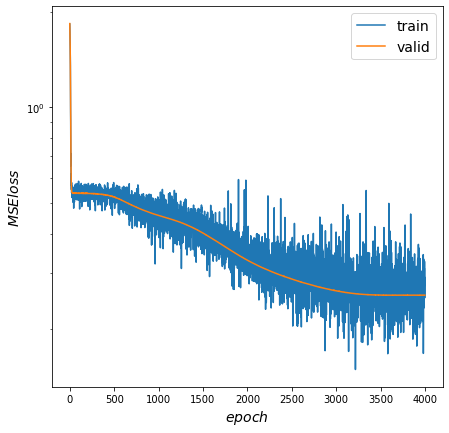

In [73]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [74]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 0.010548749127599207
MSE_err of valid data 0.00996089446263766
MSE_err of test data 0.011697787222351045
MSE_err of total data 0.010604867470578256


#### 2 variable

In [75]:
print("compress to 2")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 4000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 2
(1600, 20550, 5)


In [76]:
t_train_4 = time.time()
autoencoder_1 = FC(2).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 1.857198 | valid loss: 1.837136
Epoch:  1 | train loss: 1.791979 | valid loss: 1.774647
Epoch:  2 | train loss: 1.744195 | valid loss: 1.693542
Epoch:  3 | train loss: 1.590363 | valid loss: 1.637057
Epoch:  4 | train loss: 1.632799 | valid loss: 1.574667
Epoch:  5 | train loss: 1.499311 | valid loss: 1.481753
Epoch:  6 | train loss: 1.189584 | valid loss: 1.344249
Epoch:  7 | train loss: 1.091188 | valid loss: 1.176951
Epoch:  8 | train loss: 0.691499 | valid loss: 0.995758
Epoch:  9 | train loss: 0.824559 | valid loss: 0.824026
Epoch:  10 | train loss: 0.627258 | valid loss: 0.678767
Epoch:  11 | train loss: 0.574179 | valid loss: 0.568907
Epoch:  12 | train loss: 0.511327 | valid loss: 0.492526
Epoch:  13 | train loss: 0.460364 | valid loss: 0.443119
Epoch:  14 | train loss: 0.329234 | valid loss: 0.408862
Epoch:  15 | train loss: 0.346505 | valid loss: 0.386432
Epoch:  16 | train loss: 0.372502 | valid loss: 0.373704
Epoch:  17 | train loss: 0.425394 | valid

In [77]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 544.9603374004364


Text(0, 0.5, '$MSE loss$')

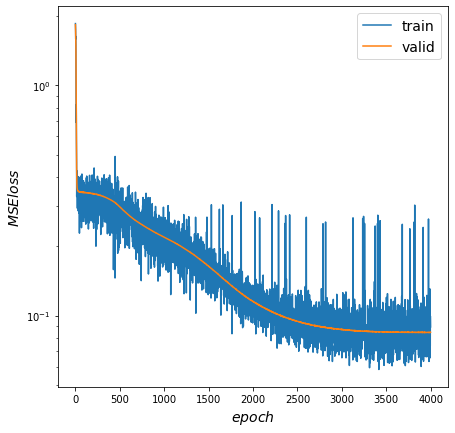

In [78]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [79]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 0.003366164768415443
MSE_err of valid data 0.0032928731292398905
MSE_err of test data 0.0030891863707805285
MSE_err of total data 0.003331137764734397


#### 4 variable

In [45]:
print("compress to 4")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 4
(1600, 20550, 5)


In [46]:
t_train_4 = time.time()
autoencoder_1 = FC(4).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 1.836691 | valid loss: 1.820652
Epoch:  1 | train loss: 1.728661 | valid loss: 1.683463
Epoch:  2 | train loss: 1.439858 | valid loss: 1.454947
Epoch:  3 | train loss: 1.222590 | valid loss: 1.187183
Epoch:  4 | train loss: 0.914699 | valid loss: 0.899866
Epoch:  5 | train loss: 0.672735 | valid loss: 0.638720
Epoch:  6 | train loss: 0.423525 | valid loss: 0.430790
Epoch:  7 | train loss: 0.311230 | valid loss: 0.287448
Epoch:  8 | train loss: 0.229511 | valid loss: 0.201431
Epoch:  9 | train loss: 0.161116 | valid loss: 0.154255
Epoch:  10 | train loss: 0.149023 | valid loss: 0.130723
Epoch:  11 | train loss: 0.103729 | valid loss: 0.118028
Epoch:  12 | train loss: 0.102501 | valid loss: 0.110753
Epoch:  13 | train loss: 0.110024 | valid loss: 0.105592
Epoch:  14 | train loss: 0.116104 | valid loss: 0.102343
Epoch:  15 | train loss: 0.085987 | valid loss: 0.099402
Epoch:  16 | train loss: 0.085494 | valid loss: 0.097364
Epoch:  17 | train loss: 0.089345 | valid

In [47]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 301.9267563819885


Text(0, 0.5, '$MSE loss$')

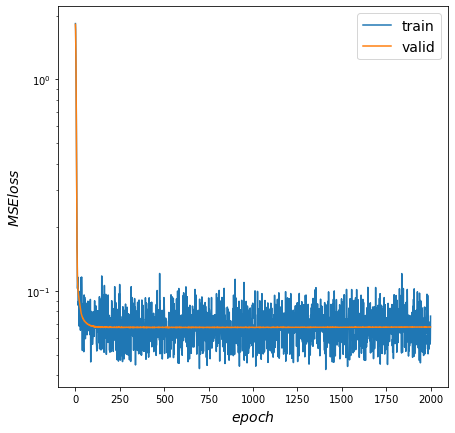

In [48]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [49]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 0.002650861132446212
MSE_err of valid data 0.002627653939337591
MSE_err of test data 0.002500614753612316
MSE_err of total data 0.0026335157752519598


#### 8 variable

In [22]:
print("compress to 8")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 8
(1600, 20550, 5)


In [23]:
t_train_4 = time.time()
autoencoder_1 = FC(8).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 1.769436 | valid loss: 1.788029
Epoch:  1 | train loss: 1.666520 | valid loss: 1.563458
Epoch:  2 | train loss: 1.276657 | valid loss: 1.242736
Epoch:  3 | train loss: 0.868304 | valid loss: 0.882487
Epoch:  4 | train loss: 0.588733 | valid loss: 0.546339
Epoch:  5 | train loss: 0.303958 | valid loss: 0.308255
Epoch:  6 | train loss: 0.205188 | valid loss: 0.181429
Epoch:  7 | train loss: 0.128207 | valid loss: 0.128518
Epoch:  8 | train loss: 0.109216 | valid loss: 0.108485
Epoch:  9 | train loss: 0.098266 | valid loss: 0.099824
Epoch:  10 | train loss: 0.087486 | valid loss: 0.094698
Epoch:  11 | train loss: 0.106612 | valid loss: 0.091269
Epoch:  12 | train loss: 0.072668 | valid loss: 0.088267
Epoch:  13 | train loss: 0.086595 | valid loss: 0.085364
Epoch:  14 | train loss: 0.082336 | valid loss: 0.082417
Epoch:  15 | train loss: 0.070221 | valid loss: 0.079787
Epoch:  16 | train loss: 0.052654 | valid loss: 0.077258
Epoch:  17 | train loss: 0.060419 | valid

In [24]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 328.1714162826538


Text(0, 0.5, '$MSE loss$')

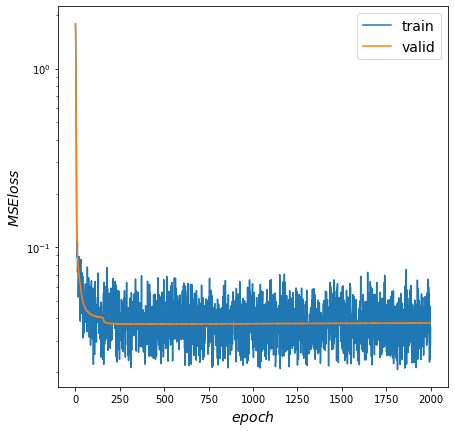

In [25]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [26]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 0.0015069425405558837
MSE_err of valid data 0.0014646045553159508
MSE_err of test data 0.001421297401950374
MSE_err of total data 0.0014941442287083602


#### 16 variable

In [50]:
print("compress to 16")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 16
(1600, 20550, 5)


In [51]:
t_train_4 = time.time()
autoencoder_1 = FC(16).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 1.740698 | valid loss: 1.716596
Epoch:  1 | train loss: 1.312787 | valid loss: 1.321009
Epoch:  2 | train loss: 0.796693 | valid loss: 0.825048
Epoch:  3 | train loss: 0.413768 | valid loss: 0.400695
Epoch:  4 | train loss: 0.206235 | valid loss: 0.188371
Epoch:  5 | train loss: 0.121416 | valid loss: 0.123315
Epoch:  6 | train loss: 0.108093 | valid loss: 0.104557
Epoch:  7 | train loss: 0.103340 | valid loss: 0.093579
Epoch:  8 | train loss: 0.081997 | valid loss: 0.088213
Epoch:  9 | train loss: 0.067801 | valid loss: 0.083573
Epoch:  10 | train loss: 0.072757 | valid loss: 0.079294
Epoch:  11 | train loss: 0.074437 | valid loss: 0.075497
Epoch:  12 | train loss: 0.086570 | valid loss: 0.072722
Epoch:  13 | train loss: 0.073724 | valid loss: 0.069309
Epoch:  14 | train loss: 0.088571 | valid loss: 0.066658
Epoch:  15 | train loss: 0.061518 | valid loss: 0.063774
Epoch:  16 | train loss: 0.064113 | valid loss: 0.062542
Epoch:  17 | train loss: 0.074775 | valid

In [52]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 303.9299807548523


Text(0, 0.5, '$MSE loss$')

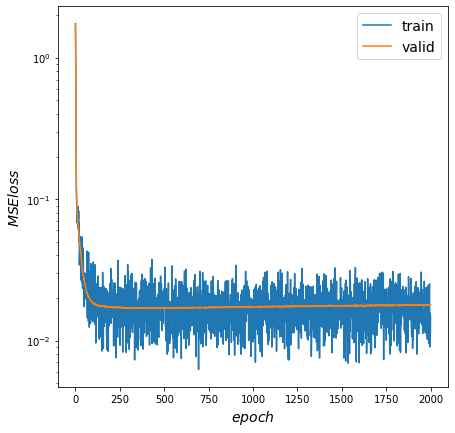

In [53]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [54]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 0.0006536374322116014
MSE_err of valid data 0.0006951027914848182
MSE_err of test data 0.0006727315762977002
MSE_err of total data 0.0006596933838984277


#### 32 variable

In [55]:
print("compress to 32")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 32
(1600, 20550, 5)


In [56]:
t_train_4 = time.time()
autoencoder_1 = FC(32).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 1.534596 | valid loss: 1.544029
Epoch:  1 | train loss: 0.836672 | valid loss: 0.866109
Epoch:  2 | train loss: 0.303827 | valid loss: 0.306564
Epoch:  3 | train loss: 0.166490 | valid loss: 0.137367
Epoch:  4 | train loss: 0.115205 | valid loss: 0.099161
Epoch:  5 | train loss: 0.100293 | valid loss: 0.082609
Epoch:  6 | train loss: 0.066833 | valid loss: 0.072959
Epoch:  7 | train loss: 0.079017 | valid loss: 0.066276
Epoch:  8 | train loss: 0.058236 | valid loss: 0.061060
Epoch:  9 | train loss: 0.049930 | valid loss: 0.056709
Epoch:  10 | train loss: 0.055902 | valid loss: 0.052885
Epoch:  11 | train loss: 0.048904 | valid loss: 0.049488
Epoch:  12 | train loss: 0.051563 | valid loss: 0.046858
Epoch:  13 | train loss: 0.051284 | valid loss: 0.043956
Epoch:  14 | train loss: 0.042074 | valid loss: 0.041742
Epoch:  15 | train loss: 0.035798 | valid loss: 0.039641
Epoch:  16 | train loss: 0.042511 | valid loss: 0.037986
Epoch:  17 | train loss: 0.058768 | valid

In [57]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 301.5214948654175


Text(0, 0.5, '$MSE loss$')

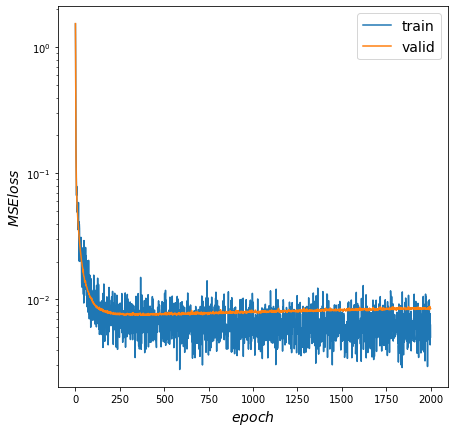

In [58]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [59]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 0.0002455052433054167
MSE_err of valid data 0.0003297486623886775
MSE_err of test data 0.00031839224790477155
MSE_err of total data 0.0002612182833253852


#### 64 variable

In [20]:
print("compress to 64")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 64
(1600, 20550, 5)


In [21]:
t_train_4 = time.time()
autoencoder_1 = FC(64).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 1.308584 | valid loss: 1.286966
Epoch:  1 | train loss: 0.423341 | valid loss: 0.381867
Epoch:  2 | train loss: 0.112331 | valid loss: 0.111830
Epoch:  3 | train loss: 0.078977 | valid loss: 0.083386
Epoch:  4 | train loss: 0.064398 | valid loss: 0.071504
Epoch:  5 | train loss: 0.045680 | valid loss: 0.063081
Epoch:  6 | train loss: 0.053517 | valid loss: 0.055157
Epoch:  7 | train loss: 0.044922 | valid loss: 0.050023
Epoch:  8 | train loss: 0.031365 | valid loss: 0.045218
Epoch:  9 | train loss: 0.051838 | valid loss: 0.042191
Epoch:  10 | train loss: 0.041166 | valid loss: 0.038607
Epoch:  11 | train loss: 0.044585 | valid loss: 0.035963
Epoch:  12 | train loss: 0.038234 | valid loss: 0.033597
Epoch:  13 | train loss: 0.034391 | valid loss: 0.030934
Epoch:  14 | train loss: 0.024493 | valid loss: 0.029053
Epoch:  15 | train loss: 0.034987 | valid loss: 0.027692
Epoch:  16 | train loss: 0.024472 | valid loss: 0.026555
Epoch:  17 | train loss: 0.020478 | valid

In [22]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 339.24222207069397


Text(0, 0.5, '$MSE loss$')

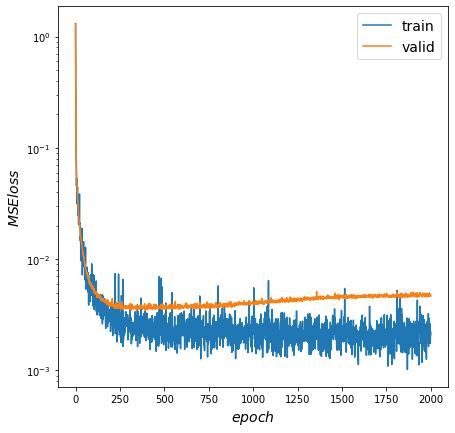

In [23]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [24]:
t_pre_0 = time.time()
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
t_pre_1 = time.time()
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))

t_pre_2 = time.time()
train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
t_pre_3 = time.time()
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())
print("Prediction time: ",t_pre_3 - t_pre_2 + t_pre_1 - t_pre_0)

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 7.810613870249324e-05
MSE_err of valid data 0.00018667691873052502
MSE_err of test data 0.00016113375176323867
MSE_err of total data 9.726597892927583e-05
Prediction time:  3.5831544399261475


##### Convert csv to vtu

In [85]:
# total_decoded[:, :, 0] = (total_decoded[:, :, 0] - bu)/ku
# total_decoded[:, :, 1] = (total_decoded[:, :, 1] - bv)/kv

# total_data[:, :, 3] = (total_data[:, :, 3] - bu)/ku
# total_data[:, :, 4] = (total_data[:, :, 4] - bv)/kv

In [34]:
# results = np.concatenate((training_decoded.cpu().data.numpy(), valid_decoded.cpu().data.numpy(), test_decoded.cpu().data.numpy()))
Latent_num = 64
results = total_decoded
print('results shape', results.shape)
N = results.shape[1] * results.shape[2]
results = results.reshape((results.shape[0],N), order='F')
print('results shape', results.shape, type(results))
# The path can be defined by user depending on the requirements
path = "./SFC_CAE/SVDAE_II"+"_LV"+str(Latent_num) + "_B"+str(BATCH_SIZE)+'E_'+str(2000)+"_result.csv"
# write results to file
np.savetxt(path, results , delimiter=',')

results shape (2000, 20550, 2)
results shape (2000, 41100) <class 'numpy.ndarray'>


In [86]:
error = total_decoded - total_data[:, :, 3:5]

In [87]:
# results = np.concatenate((training_decoded.cpu().data.numpy(), valid_decoded.cpu().data.numpy(), test_decoded.cpu().data.numpy()))
Latent_num = 64
results = error
print('results shape', results.shape)
N = results.shape[1] * results.shape[2]
results = results.reshape((results.shape[0],N), order='F')
print('results shape', results.shape, type(results))
# The path can be defined by user depending on the requirements
path = "./SFC_CAE/SVDAE"+"_LV"+str(Latent_num) + "_B"+str(BATCH_SIZE)+'E_'+str(2000)+"_error.csv"
# write results to file
np.savetxt(path, results , delimiter=',')

results shape (2000, 20550, 2)
results shape (2000, 41100) <class 'numpy.ndarray'>


#### 128 variable

In [60]:
print("compress to 128")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 128
(1600, 20550, 5)


In [61]:
t_train_4 = time.time()
autoencoder_1 = FC(128).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 0.958752 | valid loss: 0.973674
Epoch:  1 | train loss: 0.135198 | valid loss: 0.126030
Epoch:  2 | train loss: 0.092240 | valid loss: 0.075568
Epoch:  3 | train loss: 0.065874 | valid loss: 0.060051
Epoch:  4 | train loss: 0.052634 | valid loss: 0.048782
Epoch:  5 | train loss: 0.055738 | valid loss: 0.042834
Epoch:  6 | train loss: 0.031382 | valid loss: 0.038251
Epoch:  7 | train loss: 0.030692 | valid loss: 0.032892
Epoch:  8 | train loss: 0.023432 | valid loss: 0.030827
Epoch:  9 | train loss: 0.028454 | valid loss: 0.027518
Epoch:  10 | train loss: 0.036840 | valid loss: 0.025655
Epoch:  11 | train loss: 0.022831 | valid loss: 0.023902
Epoch:  12 | train loss: 0.013873 | valid loss: 0.022002
Epoch:  13 | train loss: 0.029140 | valid loss: 0.021164
Epoch:  14 | train loss: 0.027350 | valid loss: 0.019283
Epoch:  15 | train loss: 0.022627 | valid loss: 0.018040
Epoch:  16 | train loss: 0.016004 | valid loss: 0.017549
Epoch:  17 | train loss: 0.019731 | valid

In [62]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 302.5202536582947


Text(0, 0.5, '$MSE loss$')

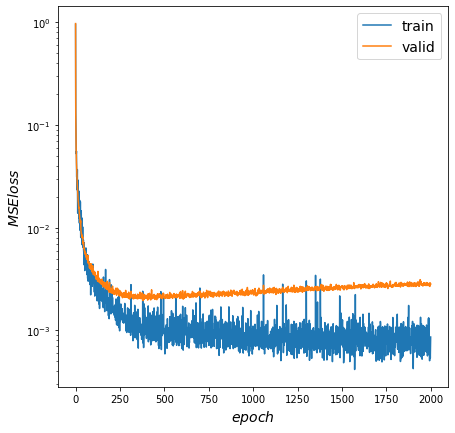

In [63]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [64]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 3.236452466264138e-05
MSE_err of valid data 0.00011025352006998719
MSE_err of test data 0.00010655007564184651
MSE_err of total data 4.75719795539822e-05


#### 256 variables

In [65]:
print("compress to 256")
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2000
BATCH_SIZE = 16
LR = 0.001
k = 20550 # number of nodes - this has to match training_data.shape[0]

print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = train_data_svd, batch_size = BATCH_SIZE, shuffle=True)

compress to 256
(1600, 20550, 5)


In [66]:
t_train_4 = time.time()
autoencoder_1 = FC(256).to(device)
optimizer = torch.optim.Adam(autoencoder_1.parameters(), lr=LR)  # Set the optimizer
autoencoder_1.apply(weight_init)  # Apply normalisation
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]
for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        #print("x", x.shape)
        b_x = x.to(device)    # bx: False   x: False
        #print("b_y",b_y.shape)
        
        encoded, decoded = autoencoder_1(b_x.float())   #decoded true  by:False
        loss = loss_func(decoded, b_x.float())  #Loss: True  # mean square error
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)
    encoded, decoded = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
    error_autoencoder = (decoded.detach() - torch.tensor(valid_data_svd).float().to(device))
    MSE_valid = (error_autoencoder**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)
t_train_5 = time.time()

Epoch:  0 | train loss: 0.614901 | valid loss: 0.584030
Epoch:  1 | train loss: 0.080158 | valid loss: 0.080582
Epoch:  2 | train loss: 0.044919 | valid loss: 0.054066
Epoch:  3 | train loss: 0.041080 | valid loss: 0.041570
Epoch:  4 | train loss: 0.031750 | valid loss: 0.034243
Epoch:  5 | train loss: 0.043448 | valid loss: 0.030081
Epoch:  6 | train loss: 0.033291 | valid loss: 0.028336
Epoch:  7 | train loss: 0.023666 | valid loss: 0.022888
Epoch:  8 | train loss: 0.017090 | valid loss: 0.021544
Epoch:  9 | train loss: 0.024673 | valid loss: 0.020544
Epoch:  10 | train loss: 0.012505 | valid loss: 0.017472
Epoch:  11 | train loss: 0.016826 | valid loss: 0.018508
Epoch:  12 | train loss: 0.015731 | valid loss: 0.015622
Epoch:  13 | train loss: 0.014804 | valid loss: 0.015440
Epoch:  14 | train loss: 0.013776 | valid loss: 0.013570
Epoch:  15 | train loss: 0.011701 | valid loss: 0.013312
Epoch:  16 | train loss: 0.009727 | valid loss: 0.011868
Epoch:  17 | train loss: 0.011508 | valid

In [67]:
print("Train time:",t_train_1 - t_train_0 + t_train_3 - t_train_2 + t_train_5 - t_train_4)

Train time: 303.6175365447998


Text(0, 0.5, '$MSE loss$')

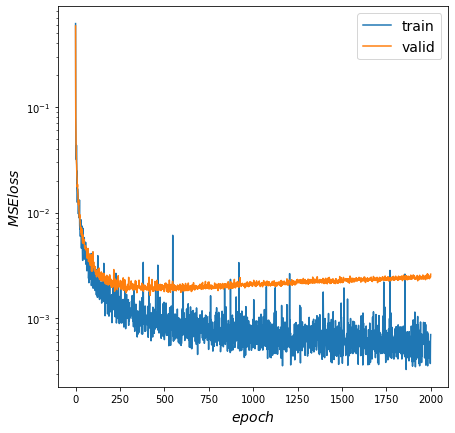

In [68]:
fig = plt.figure(figsize=(7,7))
axe1 = plt.subplot(111)
axe1.semilogy(epoch_list,loss_list,label = "train")
axe1.semilogy(epoch_list,loss_valid,label = "valid")
axe1.legend(loc = "best",fontsize=14)
axe1.set_xlabel("$epoch$",fontsize=14)
axe1.set_ylabel("$MSE loss$",fontsize=14)

In [69]:
encoded_train, decoded_train = autoencoder_1(torch.tensor(train_data_svd).float().to(device))
encoded_valid, decoded_valid = autoencoder_1(torch.tensor(valid_data_svd).float().to(device))
encoded_test, decoded_test = autoencoder_1(torch.tensor(test_data_svd).float().to(device))
encoded_total, decoded_total = autoencoder_1(torch.tensor(total_data_svd).float().to(device))


train_pre = decoded_train.cpu().data.numpy()@R
valid_pre = decoded_valid.cpu().data.numpy()@R
test_pre = decoded_test.cpu().data.numpy()@R
total_pre = decoded_total.cpu().data.numpy()@R
print(train_pre.shape)


train_decoded = np.zeros([training_data.shape[0],training_data.shape[1],2])
valid_decoded = np.zeros([valid_data.shape[0],valid_data.shape[1],2])
test_decoded = np.zeros([test_data.shape[0],test_data.shape[1],2])
total_decoded = np.zeros([total_data.shape[0],total_data.shape[1],2])
print(train_decoded.shape)


for i in range(train_decoded.shape[0]):
    train_decoded[i,:,0] = train_pre[i,:20550]
    train_decoded[i,:,1] = train_pre[i,20550:]
    
for i in range(valid_decoded.shape[0]):
    valid_decoded[i,:,0] = valid_pre[i,:20550]
    valid_decoded[i,:,1] = valid_pre[i,20550:]

for i in range(test_decoded.shape[0]):
    test_decoded[i,:,0] = test_pre[i,:20550]
    test_decoded[i,:,1] = test_pre[i,20550:]

for i in range(total_decoded.shape[0]):
    total_decoded[i,:,0] = total_pre[i,:20550]
    total_decoded[i,:,1] = total_pre[i,20550:]



train_error = train_decoded - training_data[:,:,3:5]
print("MSE_err of training data", (train_error**2).mean())

valid_error = valid_decoded - valid_data[:,:,3:5]
print("MSE_err of valid data", (valid_error**2).mean())

test_error = test_decoded - test_data[:,:,3:5]
print("MSE_err of test data", (test_error**2).mean())

total_error = total_decoded - total_data[:,:,3:5]
print("MSE_err of total data", (total_error**2).mean())

(1600, 41100)
(1600, 20550, 2)
MSE_err of training data 2.4634549930260992e-05
MSE_err of valid data 0.00010223833974665201
MSE_err of test data 0.00010013863615857223
MSE_err of total data 3.9945333692861535e-05
